# Accelerometer Dataset

This dataset was generated for use on 'Prediction of Motor Failure Time Using An Artificial Neural Network' project (DOI: 10.3390/s19194342).
A cooler fan with weights on its blades was used to generate vibrations. To this fan cooler was attached an accelerometer 
to collect the vibration data. With this data, motor failure time predictions were made, using an artificial neural networks.
To generate three distinct vibration scenarios, the weights were distributed in three different ways: 
    1) 'red' - normal configuration: two weight pieces positioned on neighboring blades; 
    2) 'blue' - perpendicular configuration: two weight pieces positioned on blades forming a 90Â° angle; 
    3) 'green' - opposite configuration: two weight pieces positioned on opposite blades. 

Devices used:
Akasa AK-FN059 12cm Viper cooling fan (Generate the vibrations)
MMA8452Q accelerometer (Measure vibration)

Data collection method:
17 rotation speeds were set up, ranging from 20% to 100% of the cooler maximum speed at 5% intervals; 
for the three weight distribution configurations in the cooler blades. 
Note that the Akasa AK-FN059 cooler has 1900 rpm of max rotation speed.

The vibration measurements were collected at a frequency of 20 ms for 1 min for each percentage, generating 3000 records per speed.
Thus, in total, 153,000 vibration records were collected from the simulation model.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00611/accelerometer.csv"
df = pd.read_csv(path)
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [4]:
df.describe()

,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


In [5]:
df.rename(columns = {"wconfid":"Weight_Config", "pctid":"CF_RPM_per"}, inplace=True)
df.head()

,Weight_Config,CF_RPM_per,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


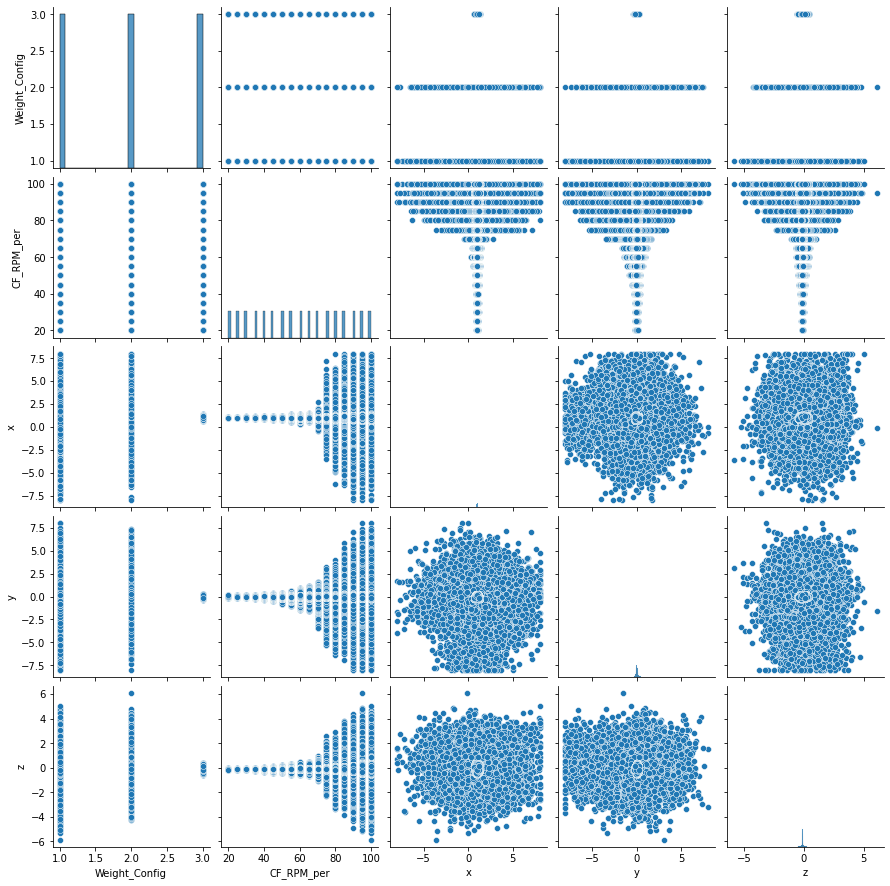

In [24]:
sns.pairplot(data=df)

<AxesSubplot:>

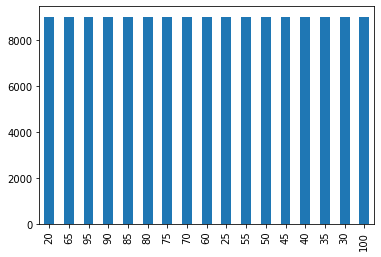

In [7]:
df["CF_RPM_per"].value_counts().plot(kind="bar")

<AxesSubplot:>

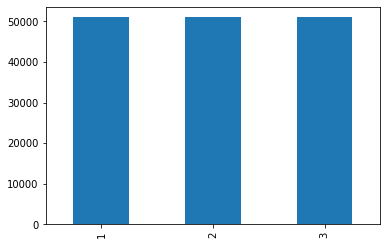

In [8]:
df["Weight_Config"].value_counts().plot(kind="bar")

In [9]:
df.corr()

,Weight_Config,CF_RPM_per,x,y,z
Weight_Config,1.000000e+00,1.035463e-15,-0.006065,0.005371,0.002228
CF_RPM_per,1.035463e-15,1.000000e+00,0.002128,0.002882,0.008964
x,-6.065048e-03,2.128479e-03,1.000000,0.021137,-0.091164
y,5.371007e-03,2.881727e-03,0.021137,1.000000,-0.027716
z,2.228362e-03,8.964497e-03,-0.091164,-0.027716,1.000000


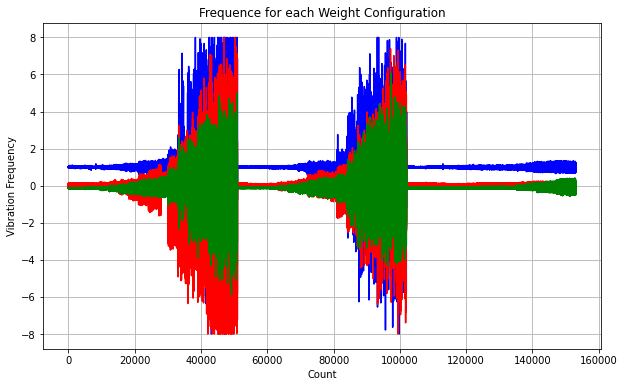

In [22]:
plt.figure(figsize=(10,6))

df["x"].plot(color="blue")
df["y"].plot(color="red")
df["z"].plot(color="green")

plt.xlabel("Count")
plt.ylabel("Vibration Frequency")
plt.title("Frequence for each Weight Configuration")

plt.grid()

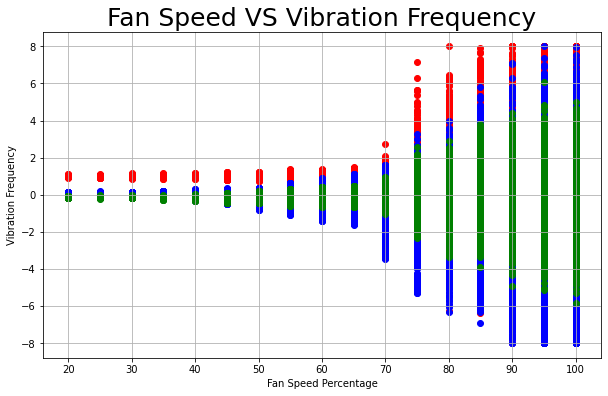

In [34]:
plt.figure(figsize=(10,6))


plt.scatter(df["CF_RPM_per"], df["x"], color="red")
plt.scatter(df["CF_RPM_per"], df["y"], color="blue")
plt.scatter(df["CF_RPM_per"], df["z"], color="green")

plt.ylabel("Vibration Frequency")
plt.xlabel("Fan Speed Percentage")
plt.title("Fan Speed VS Vibration Frequency", size=25)


plt.grid()

### From above it is conclusive that the concentration of vibration Frequency is concetrated around frequency between 3000 to 5000 value and again around 8500 to 10500